<a href="https://colab.research.google.com/github/vishal0882/DataScience/blob/main/03_Decoding_Image_Components_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% /></center>

**<center><h3>Decoding Image Components</center>**

---
# **Table of Contents**
---

**1.** [**Decoding Image Components**](#section1)<br>
  - **1.1** [**What helps the expansion of image recognition technology today?**](#section101)
  - **1.2** [**Reading Original Image**](#section102)
  - **1.3** [**Reading in BGR colorspace**](#section103)

**2.** [**Dealing with Color**](#section2)<br>
  - **2.1** [**Checking the difference between Original and Grayscale Image**](#section201)
  - **2.2** [**Plotting the Data**](#section202)
  - **2.3** [**Removing the Background**](#section203)
  - **2.4** [**Plotting Original Image and Mask side by side**](#section204)
  - **2.5** [**Object Identification**](#section205)

**3.** [**Edge Detection**](#section3)<br>
  - **3.1** [**Plot to see the difference between Original Image and the one with Sobel Filter**](#section301)
  - **3.2** [**To Highlight the Problem Areas**](#section302)
  
**4.** [**Canny Edge Detector**](#section4)<br>
**5.** [**Conclusion**](#section5)<br>

---
<a name = Section1></a>
# **1. Decoding Image Components**
---

- Image Recognition technology has a great potential of wide adoption in various industries.

  - Such corporations and startups as Tesla, Google, Uber, Adobe Systems etc heavily used image recognition.
  
  - Researchers predict that the global market of image recognition will reach **$38.92 billion** by 2021.

<a id=section101></a>
### **1.1 What helps the expansion of image recognition technology today?**


- It's open source tools that make programming easier, while computing more **affordable**.

- **Open-source frameworks** and libraries today will make it possible for companies to benefit from **image recognition** technology.

- For real time image recognition professional developers also use an open-source, cross platform library called **OpenCV**.

- In today's world, in mobile and software development images serve for a multitude of reasons, including:

  - Object recognition
  - Pattern recognition
  - Locating duplicates
  - Image search by fragments
  - Camera image processing
  - Improving mobile apps UX
  - Augmented reality

- Possible applications of image, imagetech and image recognition technology in particular are unlimited.

  - With the advancement in the technology new opportunities for businesses and startups in every niche arise.
  
  - Thus image analysis is taken to a whole new level thanks to open-source solutions and deep learning tools out there.

###**Importing Libraries**

In [ ]:
import os
import imageio
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import cv2

### **Downloading the Dataset**

- We are using **`!wget`** to download our data from web.

In [ ]:
!wget https://github.com/insaid2018/DeepLearning/raw/master/Data/nuclei_datasets.tar.gz

--2024-09-29 03:07:25--  https://github.com/insaid2018/DeepLearning/raw/master/Data/nuclei_datasets.tar.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/insaid2018/DeepLearning/master/Data/nuclei_datasets.tar.gz [following]
--2024-09-29 03:07:25--  https://raw.githubusercontent.com/insaid2018/DeepLearning/master/Data/nuclei_datasets.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84074732 (80M) [application/octet-stream]
Saving to: ‘nuclei_datasets.tar.gz’

nuclei_datasets.tar 100%[===================>]  80.18M   278MB/s    in 0.3s    

2024-09-29 03:07:25 (278 MB/s) - ‘nuclei_datasets.

### **Extracting the dataset**

- We are using **`!tar`** to extract our data.

In [ ]:
!tar xvzf nuclei_datasets.tar.gz

nuclei_datasets/
nuclei_datasets/stage1_train.zip
nuclei_datasets/stage1_test.zip


In [ ]:
%cd nuclei_datasets

/content/nuclei_datasets


- **`!ls`** is used to list of content inside a directory.

In [ ]:
!ls

stage1_test.zip  stage1_train.zip


- Making directory to store the data using **`!mkdir`**.

In [ ]:
!mkdir stage1_train

- Listing out all the content from the directory.

In [ ]:
!ls

stage1_test.zip  stage1_train  stage1_train.zip


In [ ]:
!unzip -qq stage1_train.zip -d stage1_train

- The path used in **`pathlib.Path`** is for google drive only, replace it with the path to **`stage1_train`** folder if using local system.

In [ ]:
training_paths = pathlib.Path('/content/nuclei_datasets/stage1_train').glob('*/images/*.png')
training_sorted = sorted([x for x in training_paths])
im_path = training_sorted[45]

In [ ]:
im_path

PosixPath('/content/nuclei_datasets/stage1_train/10ba6cbee4873b32d5626a118a339832ba2b15d8643f66dddcd7cb2ec80fbc28/images/10ba6cbee4873b32d5626a118a339832ba2b15d8643f66dddcd7cb2ec80fbc28.png')

<a id=section102></a>
### **1.2 Reading Original Image**

- We are using **`imageio.imread`** function read our image from the given path.

Original image shape: (520, 696, 4)


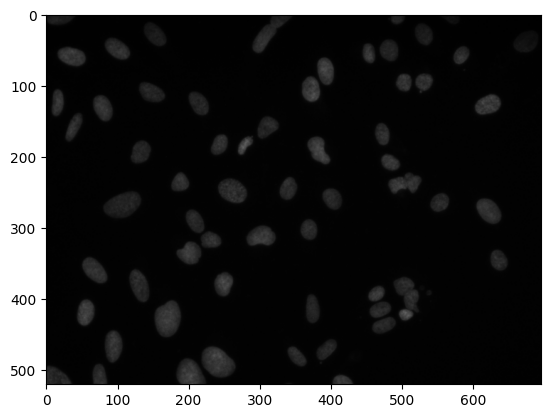

In [ ]:
im = imageio.imread(str(im_path))
print('Original image shape: {}'. format(im.shape))
plt.imshow(im)

<a id=section103></a>
### **1.3 Reading in BGR colorspace**

Original Image (520, 696, 3)


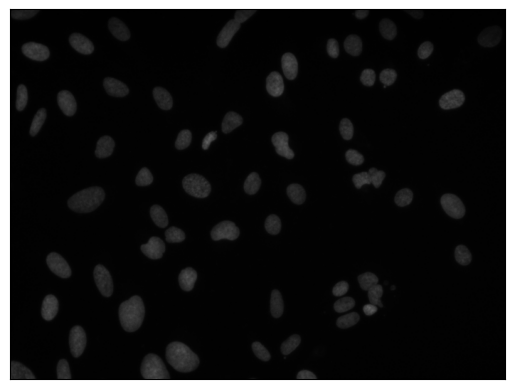

In [ ]:
bgrimg = cv2.imread(str(im_path))
plt.imshow(bgrimg)
plt.xticks([])                     # To get rid of x-tcicks and y-ticks on the image axis.
plt.yticks([])
print('Original Image', bgrimg.shape)

 #### **Lets see the structure of the image and display one row of the image matrix**

In [ ]:
print('First row of the matrix contains', len(bgrimg[1]), 'pixels')
print(bgrimg[1])

First row of the matrix contains 696 pixels
[[ 3  3  3]
 [ 6  6  6]
 [13 13 13]
 ...
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]]


**Observations**:
- Image is read in the **BGR** colorspace.

- There is a third dimension as every pixel is represented by it's B, G and R components.

- This is default colorspace in OpenCV to read images.

---
<a name = Section2></a>
# **2. Dealing with Color**
---

- The image in the dataset can be in **RGB**, **RGBA** and **grayscale format**, based on the **"modality"** in which they are acquired.

- For color images, there is a third dimension which encode the **"channel"** (e.g. Red, Green, Blue)

- To make life easier, we will coerce these images into grayscale using the **`rgb2gray`** function using **`scikit-image`**.

<a id=section201></a>
### **2.1 Checking the difference between Original and Grayscale Image**

In [ ]:
print('Original image shape: {}'. format(im.shape))           # print image dimesnion

from skimage.color import rgb2gray               # Coerce the image into grayscale format
im_gray = rgb2gray(im[:,:,:3])                    # select only the first three color channels
print('New image shape: {}'.format(im_gray.shape))
print('Original image shape: {}'.format(im.shape))  # print image dimension

Original image shape: (520, 696, 4)
New image shape: (520, 696)
Original image shape: (520, 696, 4)


<a id=section202></a>
### **2.2 Plotting the Data**

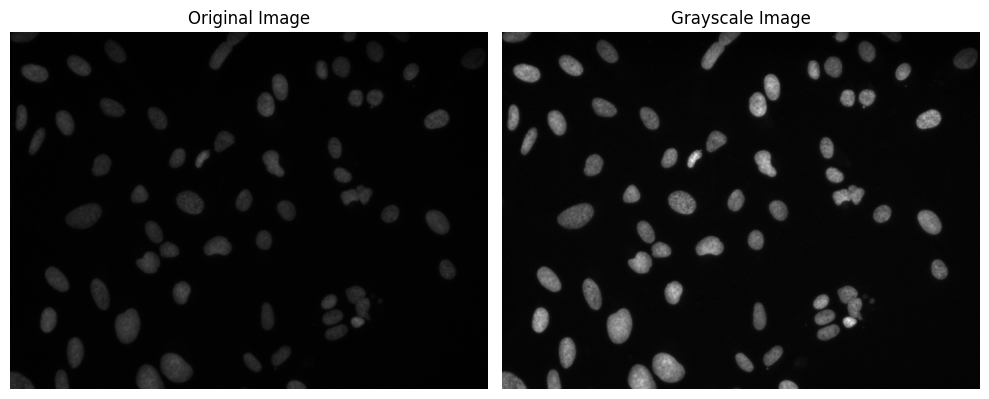

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(im)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(im_gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

plt.tight_layout()
plt.show()

**Observations**:
- It is important to understand the structure of image.

- Reduced dimension when we transformed from the BGR colorspace to grayscale. WHY?

- It is because grayscale is a range of **monochromatic** shades from black to white.

- A grayscale image contains only **shades of gray** and no color.

- Transforming the colorspace removes all color information, leaving only the **luminance** of each pixel.

- Since digital images are displayed using a combination of red, green and blue(RGB) colors, each pixel has three seperate luminance values.

- These three values must be combined into a single value when removing color from an image.

- Luminance is the **brightness** or **intensity**, which can be measured on a scale from black(zero intensity) to white(full intensity)

#### **To transform the colorspace from BGR to grayscale so as to make things simpler**

In [ ]:
grayimg = cv2.cvtColor(bgrimg,cv2.COLOR_BGR2GRAY)

#### **To understand it, let's check one entire row of the image matrix**

In [ ]:
print('The first row of the image matrix contains', len(grayimg[1]), 'pixels')
print(grayimg[1])

The first row of the image matrix contains 696 pixels
[ 3  6 13 19 20 22 26 27 27 25 24 25 25 26 30 30 31 32 29 28 27 31 32 31
 30 30 32 32 31 28 30 31 33 29 27 25 25 24 22 22 20 16 10  6  4  2  2  2
  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  2  2  1  2  2  2  1  1  2  2  2  2  1  1  1  1  2  1  1  1  1
  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  2  1  1  1  1  1  1  1  1
  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  2  1  1  1  2  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  0  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1 

<a id=section203></a>
### **2.3 Removing the Background**

Text(0.5, 1.0, 'Distibution of intensity value (Zoomed In)')

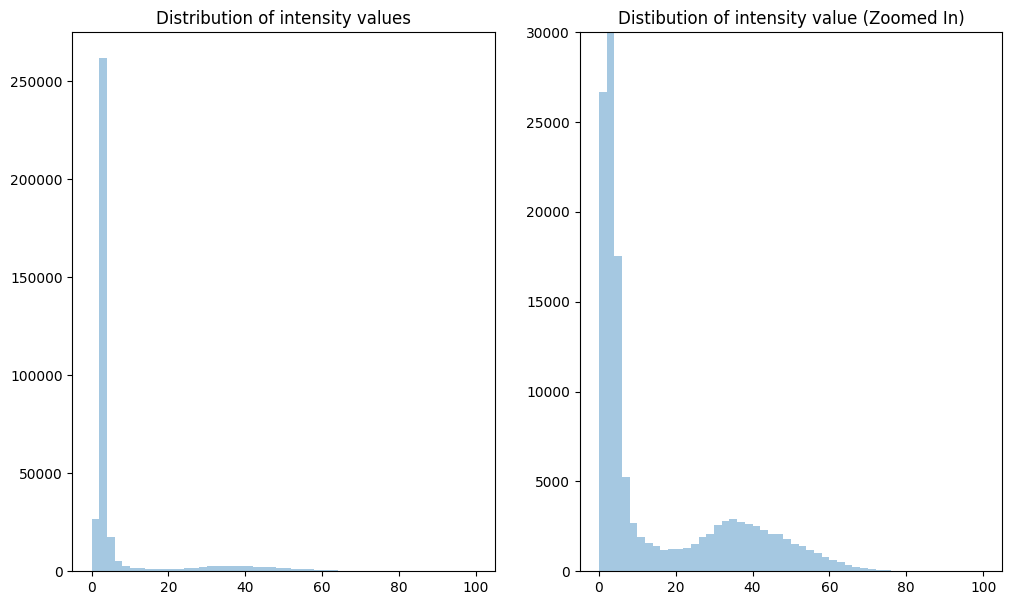

In [ ]:
# Understand the distribution of the intensity values of all the pixels
plt.figure(figsize=(12,7))

# To flatten the matrix and put the instensity values of all the pixels in one single row vector
plt.subplot(1,2,1)
sns.distplot(grayimg.flatten(), kde=False)
plt.title('Distribution of intensity values')

# Zoom in the distribution and see if there is more than one prominent peak
plt.subplot(1,2,2)
sns.distplot(grayimg.flatten(), kde=False)


plt.ylim(0, 30000)
plt.title('Distibution of intensity value (Zoomed In)')

**Observations**:
- Here we see **2 prominent** peaks.

- We would expect this to occur as the nuclei cover a small portion of the picture as compared to the background which is primarily black.

- The optimal seperation value is somewhere around **20** but instead of relying on such descriptive.

- To understand it in depth we will use **Otsu's method**.

In [ ]:
from skimage.filters import threshold_otsu
thresh_val =  threshold_otsu(grayimg)
print('The optimal speration value is', thresh_val)

The optimal speration value is 21


- **Now we will `np.where` function to encode all pixels with an intensity value > the threshold value as 1 and all other pixels as 0.<br>
The result of this function will be stored in a variable called mask.**

In [ ]:
mask=np.where(grayimg > thresh_val, 1,0)

In [ ]:

# Convert binary mask to 3-channel mask
mask3 = np.repeat(np.expand_dims(mask, axis=2), 3, axis=2)

# Apply the mask to the original image
segmented = bgrimg * mask3

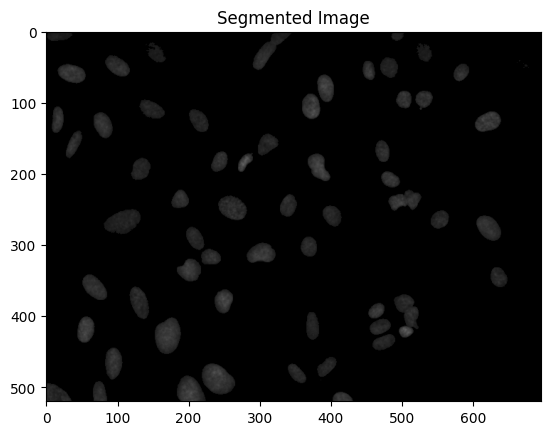

In [ ]:
# Show the segmented image
#cv2.imshow('Segmented Image', segmented)
plt.imshow(segmented)
plt.title('Segmented Image')
plt.show()

<a id=section204></a>
### **2.4 Plotting Original Image and Mask side by side**

Text(0.5, 1.0, 'Mask')

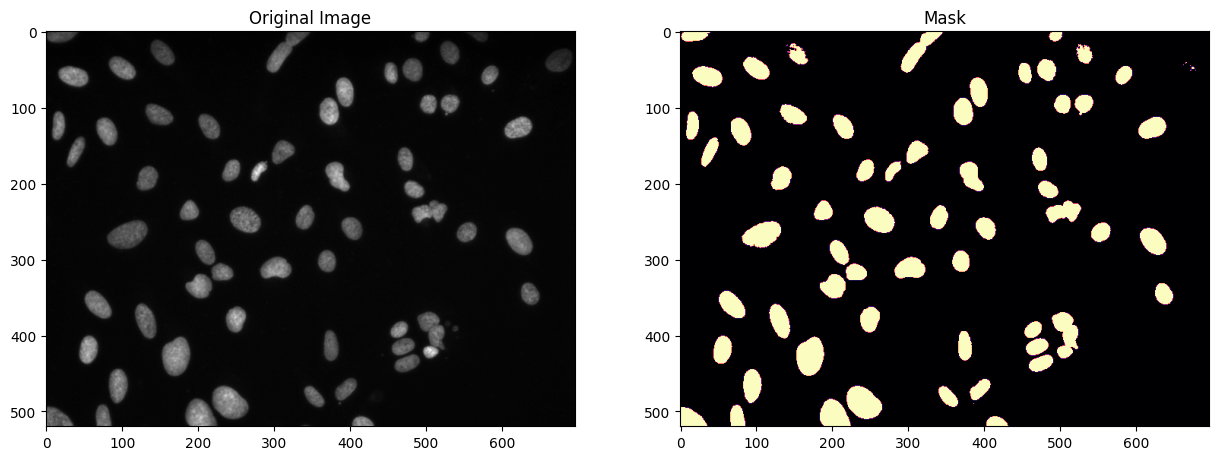

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(grayimg, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
masking = mask.copy()
plt.imshow(masking, cmap='magma')
plt.title('Mask')

**Observations**:
- We see that the mask has done a good job.

- A more careful look suggests that the mask hasn't found out all the nuceli, espacially the two in the top right corner.

- The **darker** coloured nuclei are causing a problem as the pixels that represent these nuclei have **intensity** values lesser than Otsu's threshold value.

Text(0.5, 1.0, 'Mask with Otsu Seperation')

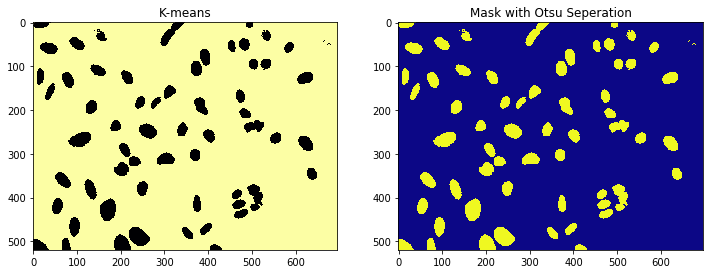

In [ ]:
# Let's see if K-means does a good job on this data.

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)

kmeans.fit(grayimg.reshape(grayimg.shape[0]*grayimg.shape[1], 1))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(kmeans.labels_.reshape(520,696), cmap='inferno')
plt.title('K-means')

plt.subplot(1,2,2)
plt.imshow(masking, cmap='plasma')
plt.title('Mask with Otsu Seperation')

**Observations**:
- It's hard to determine the difference.

- Let's check if there is any difference by comparing the labels of Otsu and K-means at a pixel level, summing over the booleans and dividing them by the
total number of pixels in the image.

- If the result is **1**, then there is **no difference** at all.

In [ ]:
# Checking if there is any difference
sum((kmeans.labels_.reshape(520,696)==mask).flatten())/(mask.shape[0]*mask.shape[1])

0.0

<a id=section205></a>
### **2.5 Object Identification**


- To get a count of the total number of nuclei.

    - We can use the **`ndimage.label`** function which labels features(pixels) in an array based on their interconnectedness.
    
- The function returns the labelled array and the number of distinct objects it found in the array.

In [ ]:
from scipy import ndimage

In [ ]:
# To understand at matrix level
matrix = np.array([[0,0,1,1,1,1],
                  [0,0,0,0,1,1],
                  [1,1,0,1,1,1],
                  [1,1,0,1,1,1]])

matrix

array([[0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1]])

In [ ]:
# Applying the ndimage.label functon
ndimage.label(matrix)

(array([[0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 1],
        [2, 2, 0, 1, 1, 1],
        [2, 2, 0, 1, 1, 1]], dtype=int32), 2)

In [ ]:
labels, nlabels=ndimage.label(mask)
print('There are', nlabels, 'distinct nuclei in the mask.')

There are 70 distinct nuclei in the mask.


**Observations:**

- Here we could have more nuclei than that as some nuclei have been combined into one and our mask hasn't been able to identify all the nuclei,

- Over to all two major problems in this image are:

    - Insignificant **spots/dots** being labelled as nuclei
    
    - The nuclei that are closer to one another get **clustered** to form one nuclei.
    - So we need to seperate then using some **Edge Detection** algorithm.

---
<a name = Section3></a>
# **3. Edge Detection**
---

- The first thing here we'll be trying out **Sobel Filter**.

  - To have a clear and concise explanation of the filter and its usage - https://docs.opencv.org/3.2.0/d2/d2c/tutorial_sobel_derivatives.html



- **cv2.Sobel arguments:**

  - the image

  - output depth

  - order of derivative of x

  - order of derivative of y

  - kernel/filter matrix size

Text(0.5, 1.0, 'Sobel Y (horizontal edges)')

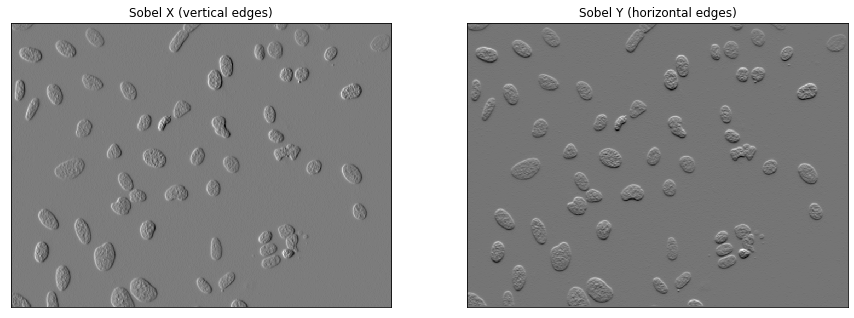

In [ ]:
sobelx = cv2.Sobel(grayimg, int(cv2.CV_64F), 1, 0, ksize=3) #ksize=3 means we'll be using the 3*3 Sobel filter.

sobely = cv2.Sobel(grayimg, int(cv2.CV_64F), 0, 1, ksize=3)

#To plot the verical and horizontal edge detectors side by side.
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.imshow(sobelx, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Sobel X (vertical edges)')

plt.subplot(1,2,2)
plt.imshow(sobely, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Sobel Y (horizontal edges)')

<a id=section301></a>
### **3.1 Plot to see the difference between Original Image and the one with Sobel Filter**

Text(0.5, 1.0, 'Sobel filter')

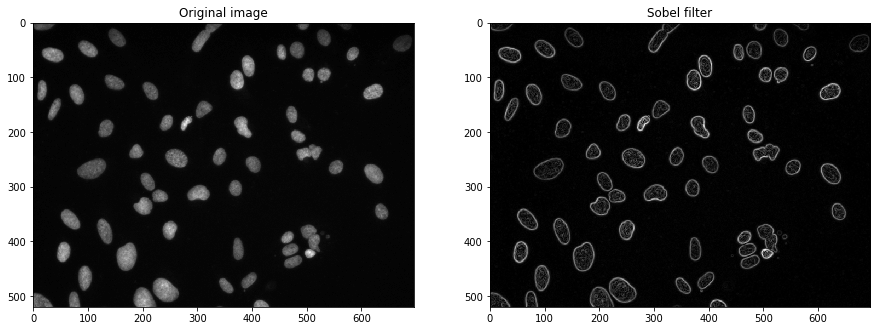

In [ ]:
# Plotting the original image
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.imshow(grayimg, cmap='gray')
plt.title('Original image')

#How to combine the 2 sobel filters
sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
plt.subplot(1,2,2)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel filter')

**Observations**:
- Sobel filter has done better in identifying objects in the image.

- The two nuclei in the top right corner, two **extremely small** nuclei have been identified.

- However minor converns remain as 2 of the 3 **overlapping nuclei** in the same region has been considered as 1, instead of all 3 above.

<a id=section302></a>
### **3.2 To Highlight the Problem Areas**

([], <a list of 0 Text yticklabel objects>)

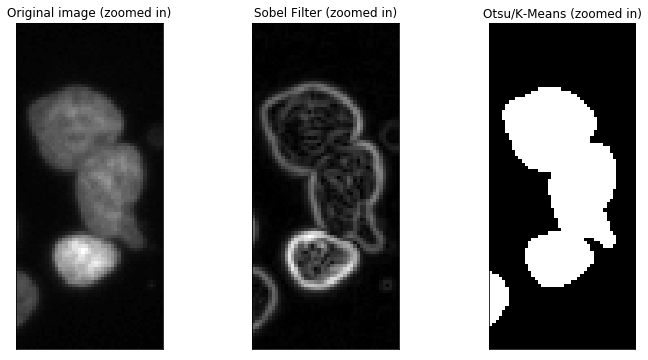

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(grayimg[350:450, 485:530], cmap='gray')
plt.title('Original image (zoomed in)')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(sobel[350:450, 485:530], cmap='gray')
plt.title('Sobel Filter (zoomed in)')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(masking[350:450, 485:530], cmap='gray')
plt.title('Otsu/K-Means (zoomed in)')
plt.xticks([])
plt.yticks([])

**Observations**:

- There is definitely improvement.

- If we fail to include a mask for a particular nucleus, the score will go down.

---
<a name = Section1></a>
# **4. Canny Edge Detector**
---


- The Canny Edge Detector is a **multistage** algorithm:-


| Stages | Description |
| ---- | ---- |
| 1st Stage | Removes background noise in the image using a Gaussian filter so that algorithm detects real edges.|
| 2nd Stage | Finds an intensity gradient in the image using a Sobel Filter |
| 3rd Stage | Unwanted pixels are removed so they will not be confused as edge |
| Final Stage | Algorithm determines which edges are real edge and those who are not at all |

        
- For more info, please refer - http://www.meccanismocomplesso.org/en/opencv-python-canny-edge-detection/#RqetSzirOmJRYDup.99

([], <a list of 0 Text yticklabel objects>)

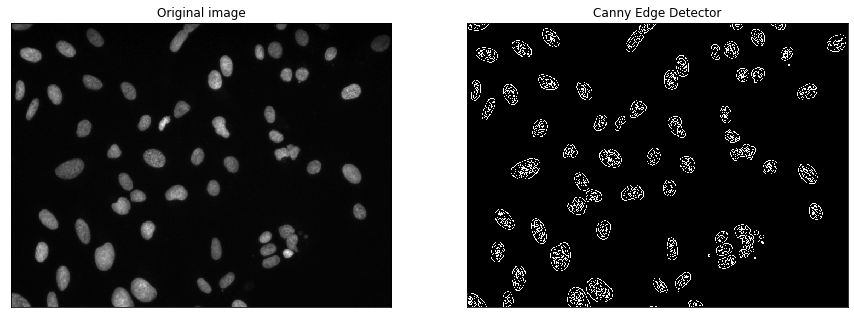

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.imshow(grayimg, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

# See how Canny Edge Detector goes on the image.
plt.subplot(1,2,2)
canny = cv2.Canny(grayimg, 0, 21)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detector')
plt.xticks([])
plt.yticks([])

**Observations**:

- The Canny edge detector has found **gradient** within the nuclei as well which gives an impression that it is an overkill.

- Also, the problem we faced with Sobel filter are visible here, however the cany edge detector has returned a modified image matrix where we only have **binary values**.

---
<a name = Section5></a>
# **5. Conclusion**
---

- From the above implementation we get to learn about different image components.

- All the about mention methods can used in any computer vision tasks.

- We will dive deep into their practical implemention in our upcoming modules.